In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from imblearn.over_sampling import SMOTE



In [2]:
# Load the wine dataset from a CSV file
wine = pd.read_csv("winequality-red.csv")



In [3]:
# Display the first few rows of the dataset
wine.head()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Check the shape of the dataset
wine.shape



(1599, 12)

In [5]:
# Generate basic statistics about the dataset
wine.describe()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
# Display information about the dataset, including data types and non-null counts
wine.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
# Check for missing values in the dataset
wine.isnull().sum()



fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
# Calculate and display the mean values for each quality rating
wine.groupby('quality').mean()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


<Axes: >

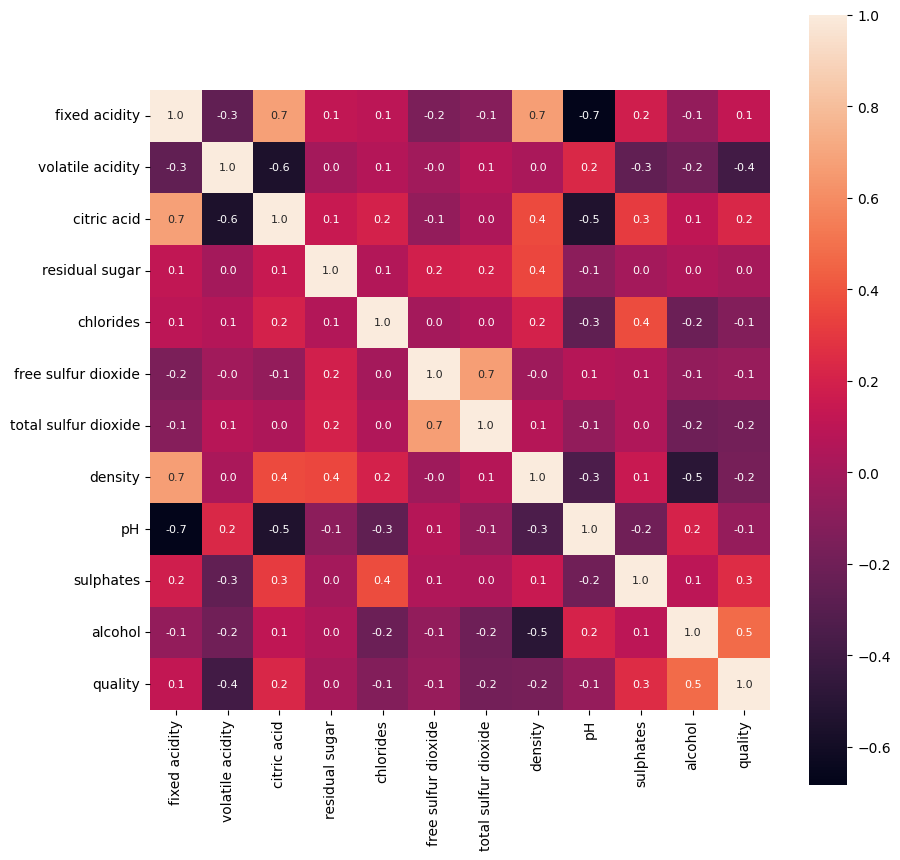

In [9]:
# Create a heatmap to visualize the correlation between features
plt.figure(figsize=(10, 10))
sns.heatmap(wine.corr(), cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8})

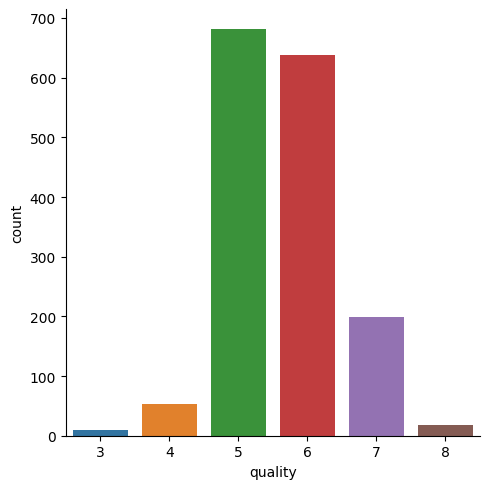

In [10]:
# Create a count plot to visualize the distribution of wine quality ratings
sns.catplot(x='quality', data=wine, kind='count')


In [11]:
# Create pair plots to visualize relationships between features
sns.pairplot(wine)

Output hidden; open in https://colab.research.google.com to view.

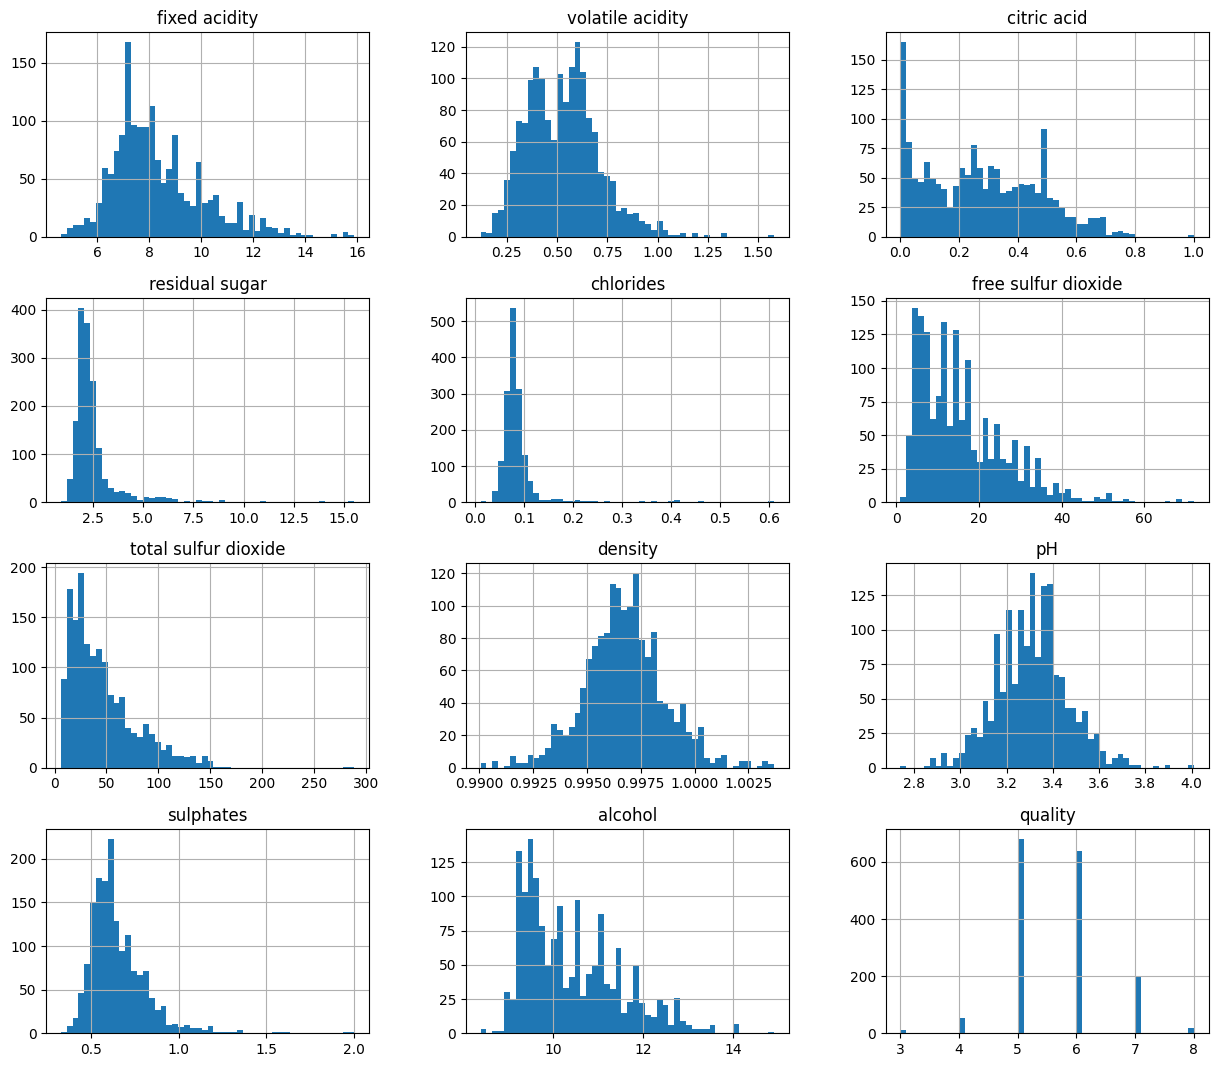

In [12]:
# Create histograms to visualize the distribution of each feature
wine.hist(figsize=(15, 13), bins=50)
plt.show()

In [13]:
# Separate the dataset into input features (X) and the target variable (y)
x = wine.drop('quality', axis=1)
y = wine['quality'].apply(lambda y_value: 1 if y_value >= 7 else 0)

In [14]:

# Display the first few rows of the input features (X)
x.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [15]:
# Display the first few rows of the target variable (y)
y.head()



0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int64

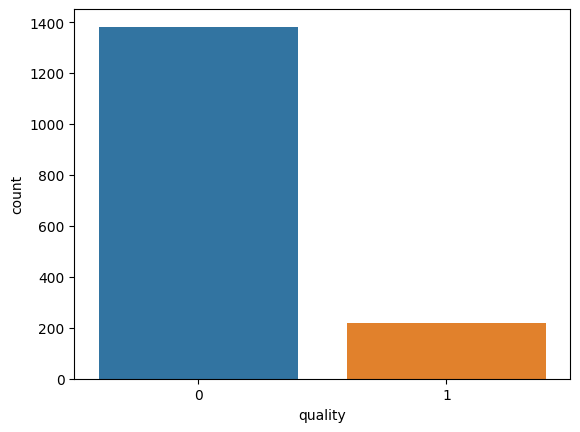

In [16]:
# Create a count plot to visualize the distribution of target variable values (0s and 1s)
sns.countplot(x=y)
count_0s = (y == 0).sum()
count_1s = (y == 1).sum()

In [17]:
# Print the counts of 0s and 1s in the target variable
print("Count of 0s:", count_0s)
print("Count of 1s:", count_1s)

Count of 0s: 1382
Count of 1s: 217


In [18]:
# Apply Synthetic Minority Over-sampling Technique (SMOTE) to balance the class distribution
X_res, y_res = SMOTE().fit_resample(x, y)

In [19]:
# Display the count of target variable values after applying SMOTE
y_res.value_counts()

0    1382
1    1382
Name: quality, dtype: int64

In [20]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [21]:
# Create and train a Linear Regression model
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

LinearRegression()

In [22]:
# Make predictions using the Linear Regression model
y_pred_linear = model_linear.predict(X_test)

In [24]:
# Calculate and display evaluation metrics for the Linear Regression model
r2_linear = r2_score(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = mean_squared_error(y_test, y_pred_linear)

print(f'R-squared (R^2): {r2_linear}')
print(f'Mean Absolute Error (MAE): {mae_linear}')
print(f'Mean Squared Error (MSE): {mse_linear}')
print(f'Root Mean Squared Error (RMSE): {rmse_linear}')

R-squared (R^2): 0.4714006376447213
Mean Absolute Error (MAE): 0.28121578824520593
Mean Squared Error (MSE): 0.1317864176158686
Root Mean Squared Error (RMSE): 0.1317864176158686


In [25]:
# Create and train a Random Forest Classifier model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

# Make predictions using the Random Forest Classifier model
y_pred_rf = random_forest_model.predict(X_test)

In [26]:
# Calculate and display evaluation metrics for the Random Forest Classifier model
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy Score : {accuracy_rf * 100}')
print(f'R-squared (R^2): {r2_rf}')
print(f'Mean Absolute Error (MAE): {mae_rf}')
print(f'Mean Squared Error (MSE): {mse_rf}')
print(f'Root Mean Squared Error (RMSE): {rmse_rf}')

Accuracy Score : 94.39421338155516
R-squared (R^2): 0.775150179690984
Mean Absolute Error (MAE): 0.05605786618444846
Mean Squared Error (MSE): 0.05605786618444846
Root Mean Squared Error (RMSE): 0.23676542438550538


In [36]:
# Create a new data point for prediction
new_data_point = pd.DataFrame({
    'fixed acidity': 17.3,
    'volatile acidity': 1.65,
    'citric acid': 0.00,
    'residual sugar': 0.2,
    'chlorides': 0.000065,
    'free sulfur dioxide': 25.0,
    'total sulfur dioxide': 25.0,
    'density': 0.9946,
    'pH': 3.39,
    'sulphates': 0.147,
    'alcohol': 20.0,
}, index=[0])

# Make a prediction using the Random Forest Classifier model
prediction = random_forest_model.predict(new_data_point)

# Display the prediction result
if prediction[0] == 1:
    print('Good Quality Wine')
else:
    print('Bad Quality Wine')

Bad Quality Wine
